In [1]:
import torch
from torch.utils import data
import torchvision
from torchvision import transforms
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

from data import LoadTest, LoadTest2
from model import VGG16
from utils import *

for name in (torch, torchvision, cv2, np):
    print(name.__version__)

1.6.0+cu101
0.7.0+cu101
4.3.0
1.19.1


In [2]:
if torch.cuda.is_available():
    device = torch.device(device='cuda')
else:
    device = torch.device(device='cpu')
device

device(type='cuda')

In [3]:
path_image = "./DUTS/DUTS-TE/DUTS-TE-Image/"
path_mask = "./DUTS/DUTS-TE/DUTS-TE-Mask/"

# path_image = "./DUT-OMROM/DUT-OMRON-image/"
# path_mask = "./DUT-OMROM/pixelwiseGT-new-PNG/"

batch_size = 8 #受限于贫穷，4是极限了
target_size = 256

In [4]:
data_loader = data.DataLoader(LoadTest(path_image, path_mask, target_size),
                            batch_size=batch_size,
                            shuffle=False)

In [5]:
total_batch = len(data_loader)
total_batch

628

In [6]:
model = VGG16()
model.load_state_dict(torch.load("./model/PFA_101.pth"), strict=False)

<All keys matched successfully>

In [7]:
model.eval()
model.to(device)
print()

In [8]:
for layer in model.parameters():
    layer.requires_grad = False

In [9]:
threshold = np.arange(0.1, 1, 0.1)
threshold

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [10]:
pre_list = np.zeros(9)
rec_list = np.zeros(9)
for batch_n, (image, mask) in enumerate(data_loader, start=1):
    image = image.to(device)
    mask = mask.to(device)
    
    predict = model(image)
    for idx, val in enumerate(threshold):
        pred = (predict >= val).float().to(device)
        
        pre = precision(pred, mask)
        pre = pre.cpu().detach()
        pre_list[idx] += np.array(pre)
        
        rec = recall(pred, mask)
        rec = rec.cpu().detach()
        rec_list[idx] += np.array(rec)

pre_list = pre_list / total_batch
rec_list = rec_list / total_batch
print(pre_list)
print(rec_list)

[0.73165371 0.77964061 0.80762315 0.82833429 0.84553849 0.86117674
 0.87643497 0.89295479 0.91367406]
[0.86186776 0.82090275 0.79044794 0.76370841 0.73783929 0.71070043
 0.67977275 0.64033239 0.57796619]


## DUTS-TE

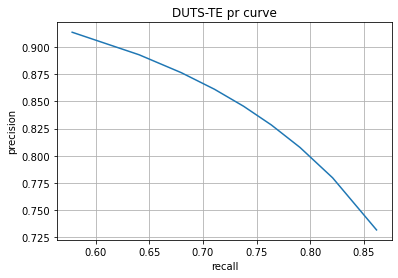

In [11]:
plt.plot(rec_list, pre_list)
plt.title("DUTS-TE pr curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid(True)
plt.show()

In [12]:
path_image = "./DUT-OMROM/DUT-OMRON-image/"
path_mask = "./DUT-OMROM/pixelwiseGT-new-PNG/"

data_loader = data.DataLoader(LoadTest(path_image, path_mask, target_size),
                            batch_size=batch_size,
                            shuffle=False)
total_batch = len(data_loader)
total_batch

646

In [13]:
pre_list = np.zeros(9)
rec_list = np.zeros(9)
for batch_n, (image, mask) in enumerate(data_loader, start=1):
    image = image.to(device)
    mask = mask.to(device)
    
    predict = model(image)
    for idx, val in enumerate(threshold):
        pred = (predict >= val).float().to(device)
        
        pre = precision(pred, mask)
        pre = pre.cpu().detach()
        pre_list[idx] += np.array(pre)
        
        rec = recall(pred, mask)
        rec = rec.cpu().detach()
        rec_list[idx] += np.array(rec)

pre_list = pre_list / total_batch
rec_list = rec_list / total_batch
print(pre_list)
print(rec_list)

[0.69986672 0.75076246 0.78066678 0.80264197 0.82099489 0.83781765
 0.85454747 0.87301484 0.89664144]
[0.82568391 0.7856183  0.75601045 0.72992815 0.70473614 0.67825984
 0.64806397 0.6094263  0.54830168]


## DUTS-OMROM

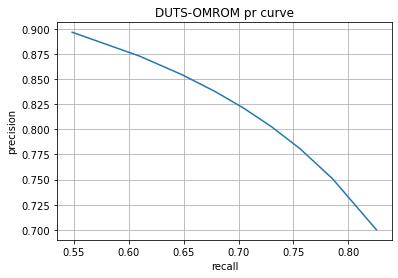

In [14]:
plt.plot(rec_list, pre_list)
plt.title("DUTS-OMROM pr curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid(True)
plt.show()

In [15]:
path_img_mask = "./HKU-IS/Imgs/"
data_loader = data.DataLoader(LoadTest2(path_img_mask, target_size),
                            batch_size=batch_size,
                            shuffle=False)
total_batch = len(data_loader)
total_batch

556

In [16]:
pre_list = np.zeros(9)
rec_list = np.zeros(9)
for batch_n, (image, mask) in enumerate(data_loader, start=1):
    image = image.to(device)
    mask = mask.to(device)
    
    predict = model(image)
    for idx, val in enumerate(threshold):
        pred = (predict >= val).float().to(device)
        
        pre = precision(pred, mask)
        pre = pre.cpu().detach()
        pre_list[idx] += np.array(pre)
        
        rec = recall(pred, mask)
        rec = rec.cpu().detach()
        rec_list[idx] += np.array(rec)

pre_list = pre_list / total_batch
rec_list = rec_list / total_batch
print(pre_list)
print(rec_list)

[0.82924631 0.86777016 0.88952589 0.90515202 0.9178458  0.92907036
 0.9398348  0.95102634 0.96410605]
[0.902283   0.86914334 0.8437557  0.82084523 0.79842554 0.77453753
 0.74662039 0.71014709 0.65068385]


## HKU-IS

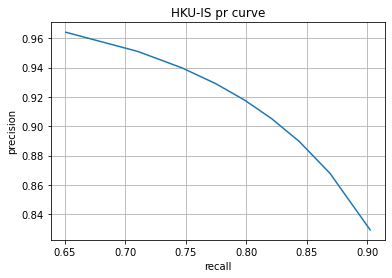

In [17]:
plt.plot(rec_list, pre_list)
plt.title("HKU-IS pr curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid(True)
plt.show()

In [18]:
path_img_mask = "./PASCAL-S/Imgs/"
data_loader = data.DataLoader(LoadTest2(path_img_mask, target_size),
                            batch_size=batch_size,
                            shuffle=False)
total_batch = len(data_loader)
total_batch

107

In [19]:
pre_list = np.zeros(9)
rec_list = np.zeros(9)
for batch_n, (image, mask) in enumerate(data_loader, start=1):
    image = image.to(device)
    mask = mask.to(device)
    
    predict = model(image)
    for idx, val in enumerate(threshold):
        pred = (predict >= val).float().to(device)
        
        pre = precision(pred, mask)
        pre = pre.cpu().detach()
        pre_list[idx] += np.array(pre)
        
        rec = recall(pred, mask)
        rec = rec.cpu().detach()
        rec_list[idx] += np.array(rec)

pre_list = pre_list / total_batch
rec_list = rec_list / total_batch
print(pre_list)
print(rec_list)

[0.78881792 0.82496629 0.84671496 0.86326871 0.87751258 0.89089565
 0.90417809 0.91870273 0.93689487]
[0.84838266 0.80944068 0.78080669 0.75621865 0.73307673 0.70920691
 0.68212412 0.6474886  0.59162952]


## PASCAL-S

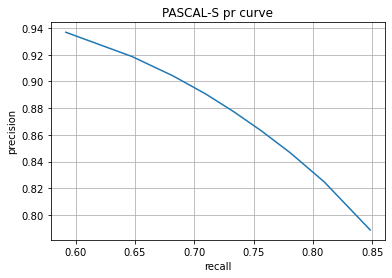

In [20]:
plt.plot(rec_list, pre_list)
plt.title("PASCAL-S pr curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid(True)
plt.show()